<a href="https://colab.research.google.com/github/mietekdom/Data_Science_Cases/blob/master/Stock_Market_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [2]:
def fetch_financial_data(company):
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

pzu = fetch_financial_data('PZU.PL')
pkn = fetch_financial_data('PKN.PL')
ge = fetch_financial_data('GE')
co = fetch_financial_data('KO')

In [3]:
pzu.columns = ['pzu_' + col.lower() for col in pzu.columns]
pkn.columns = ['pkn_' + col.lower() for col in pkn.columns]
ge.columns = ['ge_' + col.lower() for col in ge.columns]
co.columns = ['co_' + col.lower() for col in co.columns]

In [4]:
data_all = pd.concat(objs=[pkn, pzu, ge, co], axis=1)
data_all

,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
Date,,,,,,,,,,,,,,,,,,,,
2015-11-18,56.568,59.448,56.326,59.354,1695414.0,30.551,30.894,30.293,30.832,1145889.0,27.140,27.456,27.032,27.409,197951424.0,35.462,35.956,35.3870,35.894,15272553.0
2015-11-19,59.776,60.527,58.482,59.241,1755563.0,31.130,31.254,30.504,30.777,1297255.0,27.283,27.399,27.167,27.182,110157880.0,35.929,36.759,35.9290,36.599,28375840.0
2015-11-20,58.914,59.836,58.914,59.423,572471.0,30.926,30.949,30.719,30.855,869853.0,27.175,27.831,27.131,27.535,234676753.0,36.768,36.997,35.9950,36.022,23299179.0
2015-11-23,59.526,60.156,58.629,59.370,1028183.0,30.790,30.790,30.207,30.426,1479332.0,27.472,27.678,27.175,27.472,150757273.0,36.125,36.658,36.1050,36.472,15710607.0
2015-11-24,59.448,59.820,58.655,59.759,1124226.0,30.426,30.426,29.451,29.863,1905839.0,27.238,27.722,27.192,27.535,162430357.0,36.253,37.015,36.2160,36.814,18571663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-09,40.120,45.400,39.520,45.140,4060341.0,22.340,24.100,21.920,24.060,5994732.0,9.350,9.410,8.610,8.720,193282713.0,52.500,53.260,52.0700,52.570,33441952.0
2020-11-10,46.000,49.790,45.100,47.940,3903216.0,24.000,25.330,23.740,25.000,6423358.0,8.825,9.100,8.750,8.980,164733649.0,52.570,54.280,52.4500,53.980,29706666.0
2020-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.110,9.120,8.830,8.890,87439973.0,53.930,54.300,53.3300,53.580,17399922.0


In [5]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
pkn_open,1246.0,7.988108e+01,1.943413e+01,3.800000e+01,6.000175e+01,8.362600e+01,9.635525e+01,1.229200e+02
pkn_high,1246.0,8.097972e+01,1.963407e+01,3.897000e+01,6.065500e+01,8.459150e+01,9.772775e+01,1.229200e+02
pkn_low,1246.0,7.867924e+01,1.926589e+01,3.720000e+01,5.911950e+01,8.246900e+01,9.527350e+01,1.208600e+02
pkn_close,1246.0,7.981287e+01,1.946836e+01,3.774000e+01,5.984675e+01,8.351200e+01,9.641250e+01,1.225000e+02
pkn_volume,1246.0,1.068943e+06,6.535272e+05,1.828340e+05,6.492488e+05,9.164450e+05,1.291104e+06,7.733447e+06
pzu_open,1246.0,3.335529e+01,6.272814e+00,2.062000e+01,2.784925e+01,3.626700e+01,3.861400e+01,4.224600e+01
pzu_high,1246.0,3.371527e+01,6.304277e+00,2.079300e+01,2.810300e+01,3.677500e+01,3.894375e+01,4.242300e+01
pzu_low,1246.0,3.293744e+01,6.255393e+00,2.027000e+01,2.743400e+01,3.588250e+01,3.820150e+01,4.177200e+01
pzu_close,1246.0,3.332340e+01,6.277458e+00,2.055000e+01,2.784400e+01,3.626650e+01,3.858575e+01,4.222800e+01
pzu_volume,1246.0,2.167690e+06,1.384901e+06,3.627720e+05,1.309688e+06,1.847221e+06,2.610941e+06,1.472682e+07


In [6]:
data_all.columns

Index(['pkn_open', 'pkn_high', 'pkn_low', 'pkn_close', 'pkn_volume',
       'pzu_open', 'pzu_high', 'pzu_low', 'pzu_close', 'pzu_volume', 'ge_open',
       'ge_high', 'ge_low', 'ge_close', 'ge_volume', 'co_open', 'co_high',
       'co_low', 'co_close', 'co_volume'],
      dtype='object')

In [7]:
data_close = [col for col in data_all.columns if col.endswith('close')]
data_close

['pkn_close', 'pzu_close', 'ge_close', 'co_close']

In [8]:
x = data_all[data_close] # dane - cena zamkniecia 
x.head()

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-11-18,59.354,30.832,27.409,35.894
2015-11-19,59.241,30.777,27.182,36.599
2015-11-20,59.423,30.855,27.535,36.022
2015-11-23,59.370,30.426,27.472,36.472
2015-11-24,59.759,29.863,27.535,36.814


In [9]:
x_2020 = x['2020-01-01' : ] #dane od początku 2020 roku
x.head(5)

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-11-18,59.354,30.832,27.409,35.894
2015-11-19,59.241,30.777,27.182,36.599
2015-11-20,59.423,30.855,27.535,36.022
2015-11-23,59.370,30.426,27.472,36.472
2015-11-24,59.759,29.863,27.535,36.814


In [10]:
close_pln = x_2020.iloc[:, :2]
close_pln

,pkn_close,pzu_close
Date,,
2020-01-02,85.544,41.30
2020-01-03,84.324,40.90
2020-01-06,NaN,NaN
2020-01-07,80.960,40.51
2020-01-08,80.212,39.66
...,...,...
2020-11-09,45.140,24.06
2020-11-10,47.940,25.00
2020-11-11,NaN,NaN


In [11]:
close_usd = x_2020.iloc[:, 2:]
close_usd

,ge_close,co_close
Date,,
2020-01-02,11.88,53.587
2020-01-03,11.92,53.296
2020-01-06,12.09,53.276
2020-01-07,12.00,52.866
2020-01-08,11.89,52.963
...,...,...
2020-11-09,8.72,52.570
2020-11-10,8.98,53.980
2020-11-11,8.89,53.580


**Plots (Matplotlib Pyplot)**

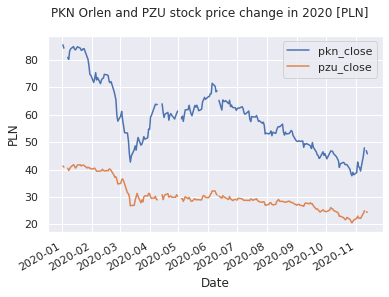

In [12]:
_ = close_pln.plot()
_ = plt.suptitle('PKN Orlen and PZU stock price change in 2020 [PLN]')
_ = plt.xlabel('Date')
_ = plt.ylabel('PLN')

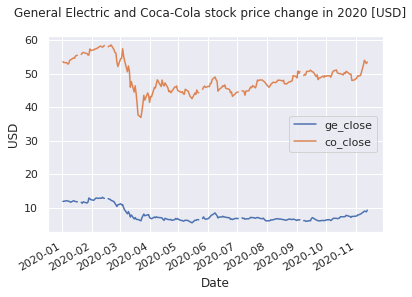

In [13]:

_ = close_usd.plot()
_ = plt.suptitle('General Electric and Coca-Cola stock price change in 2020 [USD]')
_ = plt.xlabel('Date')
_ = plt.ylabel('USD')

In [14]:
x_2020.reset_index(level=0, inplace=True)
x_2020

,Date,pkn_close,pzu_close,ge_close,co_close
0,2020-01-02,85.544,41.30,11.88,53.587
1,2020-01-03,84.324,40.90,11.92,53.296
2,2020-01-06,NaN,NaN,12.09,53.276
3,2020-01-07,80.960,40.51,12.00,52.866
4,2020-01-08,80.212,39.66,11.89,52.963
...,...,...,...,...,...
221,2020-11-09,45.140,24.06,8.72,52.570
222,2020-11-10,47.940,25.00,8.98,53.980
223,2020-11-11,NaN,NaN,8.89,53.580
224,2020-11-12,46.920,24.56,8.76,53.010


**Plots (Plotly Express)**

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.pkn_close, name='PKN Orlen'))
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.pzu_close, name='PZU'))

fig.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.ge_close, name='General Electric'))
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.co_close, name='Coca-Cola'))

fig.show()

In [17]:
data_all

,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
Date,,,,,,,,,,,,,,,,,,,,
2015-11-18,56.568,59.448,56.326,59.354,1695414.0,30.551,30.894,30.293,30.832,1145889.0,27.140,27.456,27.032,27.409,197951424.0,35.462,35.956,35.3870,35.894,15272553.0
2015-11-19,59.776,60.527,58.482,59.241,1755563.0,31.130,31.254,30.504,30.777,1297255.0,27.283,27.399,27.167,27.182,110157880.0,35.929,36.759,35.9290,36.599,28375840.0
2015-11-20,58.914,59.836,58.914,59.423,572471.0,30.926,30.949,30.719,30.855,869853.0,27.175,27.831,27.131,27.535,234676753.0,36.768,36.997,35.9950,36.022,23299179.0
2015-11-23,59.526,60.156,58.629,59.370,1028183.0,30.790,30.790,30.207,30.426,1479332.0,27.472,27.678,27.175,27.472,150757273.0,36.125,36.658,36.1050,36.472,15710607.0
2015-11-24,59.448,59.820,58.655,59.759,1124226.0,30.426,30.426,29.451,29.863,1905839.0,27.238,27.722,27.192,27.535,162430357.0,36.253,37.015,36.2160,36.814,18571663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-09,40.120,45.400,39.520,45.140,4060341.0,22.340,24.100,21.920,24.060,5994732.0,9.350,9.410,8.610,8.720,193282713.0,52.500,53.260,52.0700,52.570,33441952.0
2020-11-10,46.000,49.790,45.100,47.940,3903216.0,24.000,25.330,23.740,25.000,6423358.0,8.825,9.100,8.750,8.980,164733649.0,52.570,54.280,52.4500,53.980,29706666.0
2020-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.110,9.120,8.830,8.890,87439973.0,53.930,54.300,53.3300,53.580,17399922.0


In [18]:
data_changed = data_all.reset_index()

data_changed

,Date,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
0,2015-11-18,56.568,59.448,56.326,59.354,1695414.0,30.551,30.894,30.293,30.832,1145889.0,27.140,27.456,27.032,27.409,197951424.0,35.462,35.956,35.3870,35.894,15272553.0
1,2015-11-19,59.776,60.527,58.482,59.241,1755563.0,31.130,31.254,30.504,30.777,1297255.0,27.283,27.399,27.167,27.182,110157880.0,35.929,36.759,35.9290,36.599,28375840.0
2,2015-11-20,58.914,59.836,58.914,59.423,572471.0,30.926,30.949,30.719,30.855,869853.0,27.175,27.831,27.131,27.535,234676753.0,36.768,36.997,35.9950,36.022,23299179.0
3,2015-11-23,59.526,60.156,58.629,59.370,1028183.0,30.790,30.790,30.207,30.426,1479332.0,27.472,27.678,27.175,27.472,150757273.0,36.125,36.658,36.1050,36.472,15710607.0
4,2015-11-24,59.448,59.820,58.655,59.759,1124226.0,30.426,30.426,29.451,29.863,1905839.0,27.238,27.722,27.192,27.535,162430357.0,36.253,37.015,36.2160,36.814,18571663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,2020-11-09,40.120,45.400,39.520,45.140,4060341.0,22.340,24.100,21.920,24.060,5994732.0,9.350,9.410,8.610,8.720,193282713.0,52.500,53.260,52.0700,52.570,33441952.0
1285,2020-11-10,46.000,49.790,45.100,47.940,3903216.0,24.000,25.330,23.740,25.000,6423358.0,8.825,9.100,8.750,8.980,164733649.0,52.570,54.280,52.4500,53.980,29706666.0
1286,2020-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.110,9.120,8.830,8.890,87439973.0,53.930,54.300,53.3300,53.580,17399922.0
1287,2020-11-12,47.820,49.000,45.580,46.920,2656991.0,24.720,25.150,24.380,24.560,6525650.0,8.760,8.870,8.670,8.760,79618484.0,53.050,53.210,52.6050,53.010,15026961.0


In [19]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.ge_open, high=data_changed.ge_high, low=data_changed.ge_low, 
                                    close=data_changed.ge_close),layout=go.Layout(title_text='General Electric Company stock market'))
fig.show()

In [20]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.co_open, high=data_changed.co_high, low=data_changed.co_low, 
                                    close=data_changed.co_close),layout=go.Layout(title_text='Coca-Cola Company stock market'))
fig.show()

In [21]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.pkn_open, high=data_changed.pkn_high, low=data_changed.pkn_low, 
                                    close=data_changed.pkn_close),layout=go.Layout(title_text='Polski Koncern Naftowy Orlen Company stock market'))
fig.show()